<a href="https://colab.research.google.com/github/hyeokjun0804/HJ_BigData_Maketing_Course/blob/main/%ED%95%B4%EC%BB%A4%ED%86%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline
!pip install koreanize-matplotlib
import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 데이터 불러오기
data = pd.read_csv('data.csv')

# 데이터 전처리
X = data.drop(['id', 'diagnosis'], axis=1)  # 불필요한 열 제거
X = (X - X.mean()) / X.std()  # 표준화

# 군집 분석 알고리즘 선택
kmeans = KMeans(n_clusters=2)

# 모델 학습 및 군집화
kmeans.fit(X)
labels = kmeans.labels_

# 결과 시각화
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
위 코드에서는 유방암 데이터셋을 불러와서 'id'와 'diagnosis' 열을 제외하고 표준화한 뒤, K-Means 알고리즘을 사용하여 2개의 클러스터로 묶은 결과를 시각화하고 있습니다.

위 코드에서 사용된 데이터셋은 예시를 위해 선택한 것이며, 실제 데이터셋을 군집 분석할 때에는 해당 데이터셋의 특성에 맞는 적절한 전처리와 군집 분석 알고리즘을 선택하여 적용해야 합니다.

5대 범죄 발생현황

In [4]:
seoul = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv file/5대범죄_발생현황 2020~2021년 소개합.csv")

seoul

,자치구별,2020년~2021소계
0,도봉구,4039
1,성동구,4474
2,서대문구,4811
3,성북구,4978
4,금천구,5037
5,강북구,5071
6,용산구,5350
7,종로구,5814
8,동작구,5831
9,양천구,6231


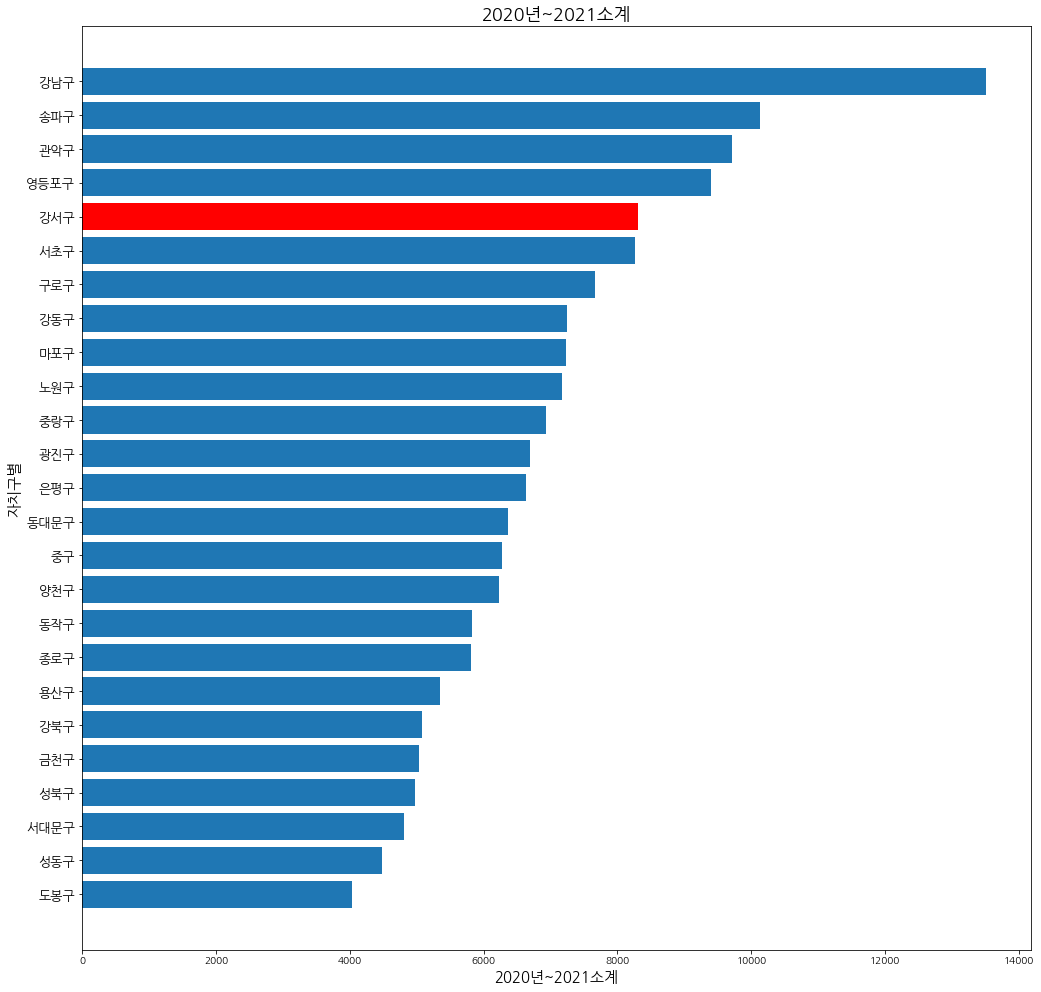

In [5]:
label = seoul['자치구별']
data_1 = seoul["2020년~2021소계"]
threshold =seoul[seoul['자치구별']=='강서구']['자치구별'].index[0]
index = range(len(label))  # index 추가
plt.figure(figsize=(17,17)) 
plt.barh(index, data_1)


plt.barh(index[threshold], data_1[threshold], color='red')

plt.title('2020년~2021소계', fontsize=18)

plt.ylabel('자치구별', fontsize=15)

plt.xlabel('2020년~2021소계', fontsize=15)

plt.yticks(index, label, fontsize=13, rotation=0)

plt.show()


In [6]:
crime = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv file/강서구_5대범죄현황.csv")
crime

,살인,강도,강간·강제추행,절도,폭력
0,19,9,511,3229,4543


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   살인       1 non-null      int64
 1   강도       1 non-null      int64
 2   강간·강제추행  1 non-null      int64
 3   절도       1 non-null      int64
 4   폭력       1 non-null      int64
dtypes: int64(5)
memory usage: 168.0 bytes


In [8]:
crime.columns

Index(['살인', '강도', '강간·강제추행', '절도', '폭력'], dtype='object')

<AxesSubplot:title={'center':'강서구 5대 범죄'}>

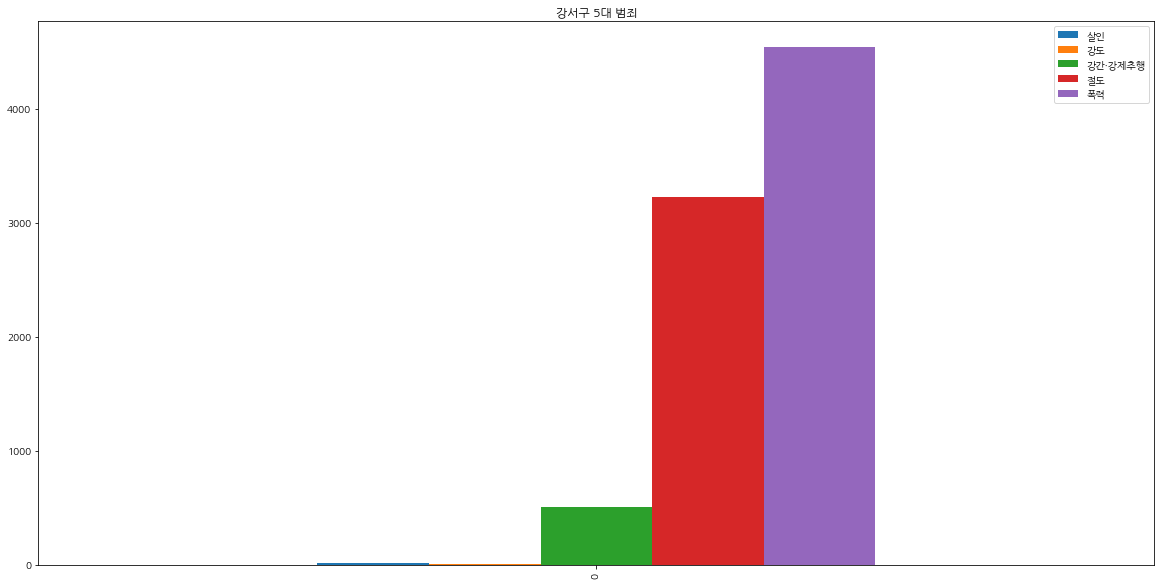

In [9]:
crime.plot(kind = "bar", title = "강서구 5대 범죄", figsize=(20,10))

<AxesSubplot:>

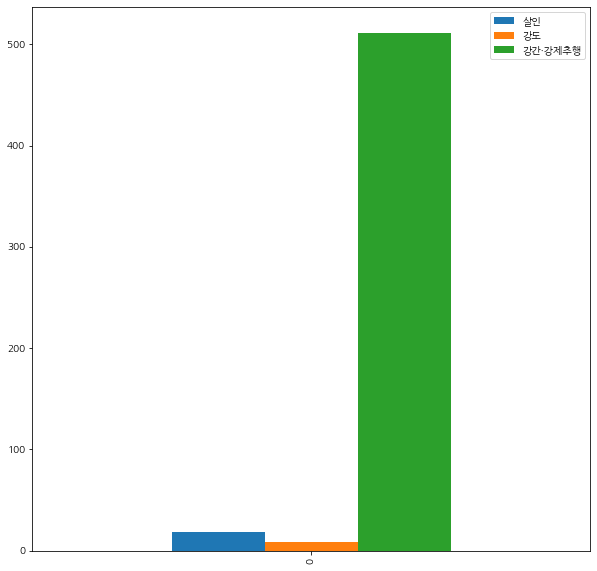

In [10]:
crime[['살인','강도','강간·강제추행']].plot(kind = "bar",figsize=(10,10), width = 0.5)

<AxesSubplot:>

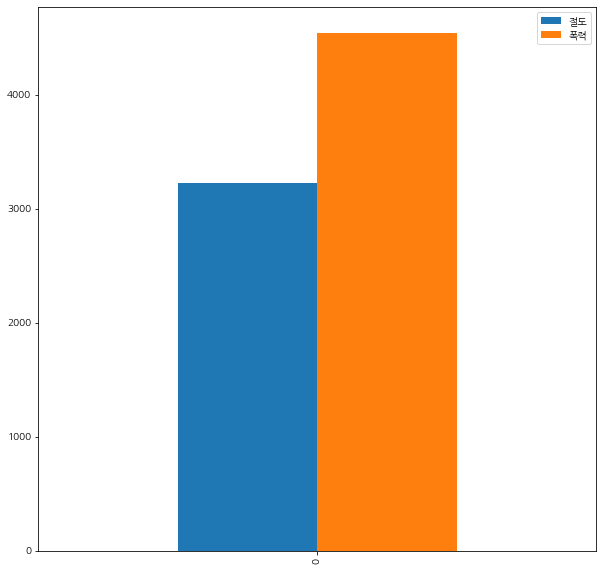

In [11]:
crime[['절도', '폭력']].plot(kind = "bar",figsize=(10,10), width = 0.5)

CCTV

In [12]:
cctv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv file/CCTV 정보(서울특별시_강서구).csv")
cctv

,관리기관명,소재지지번주소,설치년월,보관일수,카메라대수,경도,소재지도로명주소,위도,설치목적구분,촬영방면정보,데이터기준일자,카메라화소수,관리기관전화번호
0,서울특별시 시청,서울특별시 강서구 개화동 224번지,NaN,0,1,126.801000,NaN,37.586655,재난재해,서울 강서구 개화동 행주대교,2018-03-07,NaN,02-2100-5397
1,중앙혈액검사센터,서울특별시 강서구 염창동 280-21,2008-10,30,16,126.871295,서울특별시 강서구 공항대로 69길,37.548465,생활방범,NaN,2017-04-19,200.0,02-2657-0010
2,서울서부혈액원,서울특별시 강서구 염창동 280-14,2011-09,30,16,126.870847,서울특별시 강서구 공항대로 591,37.548002,생활방범,NaN,2017-04-19,30.0,02-6711-0115
3,서울서부혈액원,서울특별시 강서구 화곡동 1006-1,2012-07,30,8,126.835811,서울특별시 강서구 강서로45길 5 2층,37.547816,생활방범,NaN,2017-04-19,41.0,02-2603-5817
4,서울특별시 강서구청,서울특별시 강서구 화곡6동 1130-35,2017-12,30,3,126.853601,NaN,37.551217,어린이보호,360도전방면,2018-02-19,200.0,02-2600-1884
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,인천광역시 부평구청,인천광역시 부평구 부개동 499-6 청운공원,Aug-17,30,1,126.853682,인천광역시 부평구 수변로 189,37.529476,생활방범,360도 전방면,2018-02-14,130.0,032-509-6112
701,서울특별시시설관리공단,서울특별시 강서구 개화동 663,2014-01,30,8,126.798922,서울특별시 강서구 개화동로8길 17 (개화동),37.576980,시설물관리,주차장 내부,2017-11-15,41.0,02-2290-6449
702,서울특별시시설관리공단,서울특별시 강서구 방화동 846,2011-00,30,8,126.805774,서울특별시 강서구 양천로 22 (방화동),37.572362,시설물관리,주차장 내부,2017-11-15,41.0,02-2290-6449
703,서울특별시시설관리공단,서울특별시 강서구 개화동 490-3,2011-00,30,73,126.798208,서울특별시 강서구 개화동로8길 19 (개화동),37.577917,시설물관리,주차장 내부,2017-11-15,41.0,02-2290-6449
